# 1. Defining Problem Statement and Analysing basic metrics.

The business objective is to help Aerofit identify the characteristics of its target audience for each treadmill product they offer (KP281, KP481, and KP781) by analyzing customer data. The aim is to understand if there are significant differences in customer characteristics such as age, gender, income, and fitness level across different treadmill products. This information will be used to provide personalized product recommendations to new customers and to optimize marketing strategies.

Basic Metrics:

-    Data Shape and Data Types.
-    Statistical Summary for Numerical Attributes.
-    Categorical Variables: Frequency Distribution.
-    Outlier Detection.
-    Proportions and Probabilities.
-    Correlation Analysis.

## 1.1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"data/data.csv")
display(df.head())

print(f"Shape of the dataset: {df.shape}")

print(df.dtypes)

# Convert categorical attributes to 'category' data type
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

# Verify the changes
print(df.dtypes)

print(df.describe())

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Shape of the dataset: (180, 9)
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object
Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   505

# 2. Non-Graphical Analysis: Value counts and unique attributes

In [11]:
# Unique values for categorical columns
unique_product = df['Product'].unique()
unique_gender = df['Gender'].unique()
unique_marital_status = df['MaritalStatus'].unique()

print(f"Unique Products: {unique_product}")
print(f"Unique Genders: {unique_gender}")
print(f"Unique Marital Status: {unique_marital_status}\n")

# Value counts for categorical variables
product_counts = df['Product'].value_counts()
gender_counts = df['Gender'].value_counts()
marital_status_counts = df['MaritalStatus'].value_counts()

print("Value Counts for Products:")
print(product_counts)
print("\nValue Counts for Gender:")
print(gender_counts)
print("\nValue Counts for Marital Status:")
print(marital_status_counts)

# Unique values for numerical columns
unique_age = df['Age'].nunique()
unique_income = df['Income'].nunique()
unique_usage = df['Usage'].nunique()
unique_fitness = df['Fitness'].nunique()
unique_miles = df['Miles'].nunique()

print(f"\nUnique Age Values: {unique_age}")
print(f"Unique Income Values: {unique_income}")
print(f"Unique Usage Values: {unique_usage}")
print(f"Unique Fitness Ratings: {unique_fitness}")
print(f"Unique Miles Values: {unique_miles}\n")

# Value counts for discrete numerical variables
usage_counts = df['Usage'].value_counts()
fitness_counts = df['Fitness'].value_counts()

print("Value Counts for Usage:")
print(usage_counts)
print("\nValue Counts for Fitness:")
print(fitness_counts)

Unique Products: ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
Unique Genders: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Unique Marital Status: ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

Value Counts for Products:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Value Counts for Gender:
Gender
Male      104
Female     76
Name: count, dtype: int64

Value Counts for Marital Status:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Unique Age Values: 32
Unique Income Values: 62
Unique Usage Values: 6
Unique Fitness Ratings: 5
Unique Miles Values: 37

Value Counts for Usage:
Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

Value Counts for Fitness:
Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64


# 3. Visual Analysis - Univariate & Bivariate

## 3.1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis

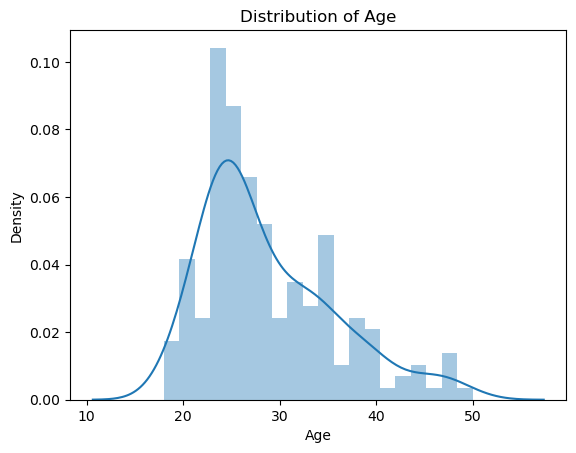

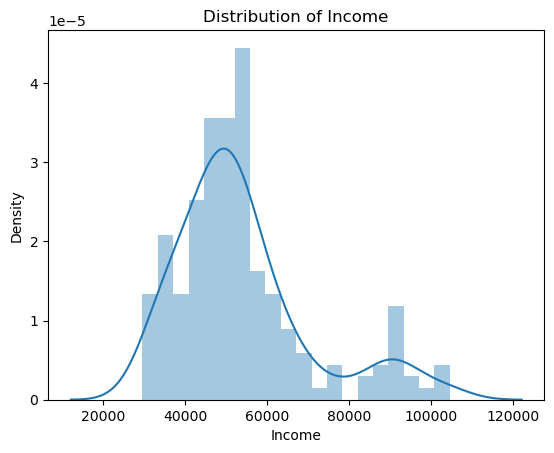

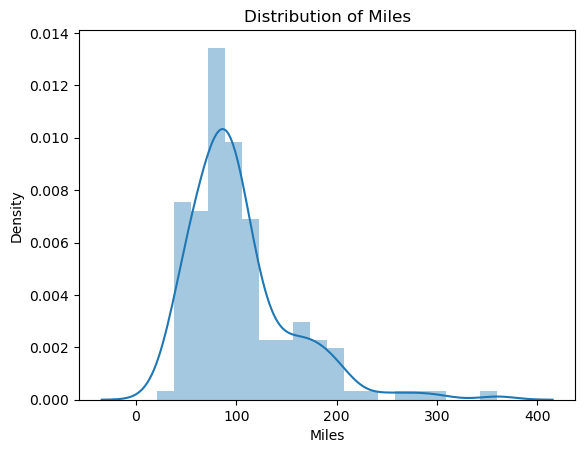

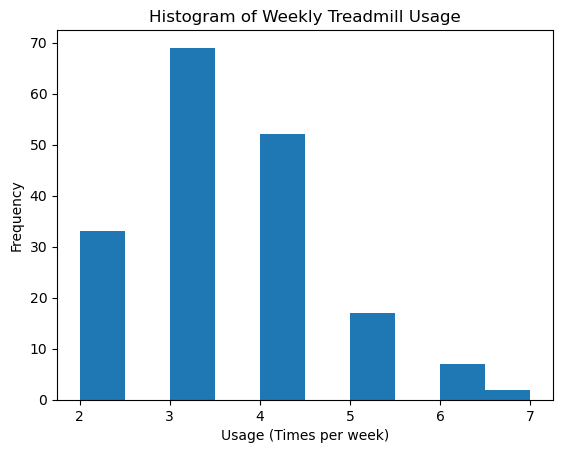

In [ ]:
# Distribution plot for Age
sns.distplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.savefig('figures/Distribution_of_Age.png')
plt.show()

# Distribution plot for Income
sns.distplot(df['Income'], kde=True, bins=20)
plt.title('Distribution of Income')
plt.savefig('figures/Distribution_of_Income.png')
plt.show()

# Distribution plot for Miles
sns.distplot(df['Miles'], kde=True, bins=20)
plt.title('Distribution of Miles')
plt.savefig('figures/Distribution_of_Miles.png')
plt.show()

# Histogram for Usage
plt.hist(df['Usage'], bins=10)
plt.title('Histogram of Weekly Treadmill Usage')
plt.xlabel('Usage (Times per week)')
plt.ylabel('Frequency')
plt.savefig('figures/Histogram_of_Weekly_Treadmill_Usage.png')
plt.show()

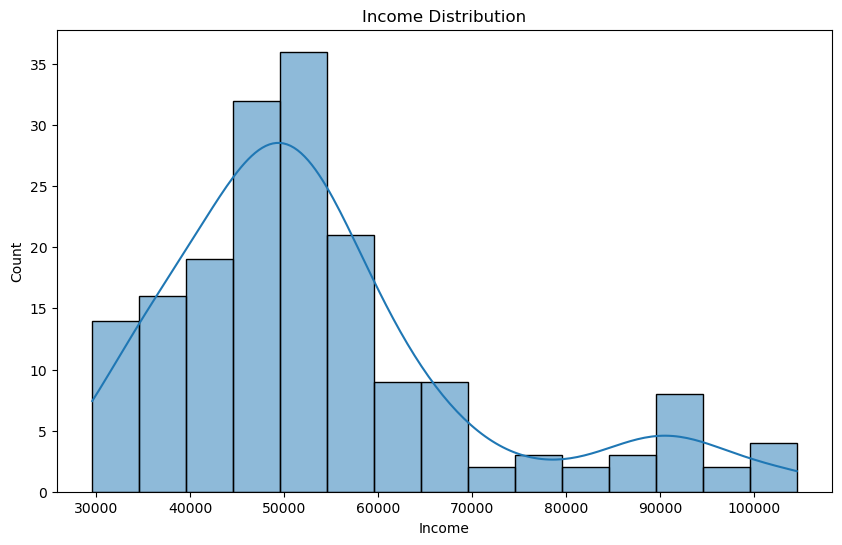

In [ ]:
plt.figure(figsize=[10,6])
sns.histplot(df["Income"], kde=True)
plt.title("Income Distribution")
plt.savefig('figures/Income_Distribution.png')
plt.show()

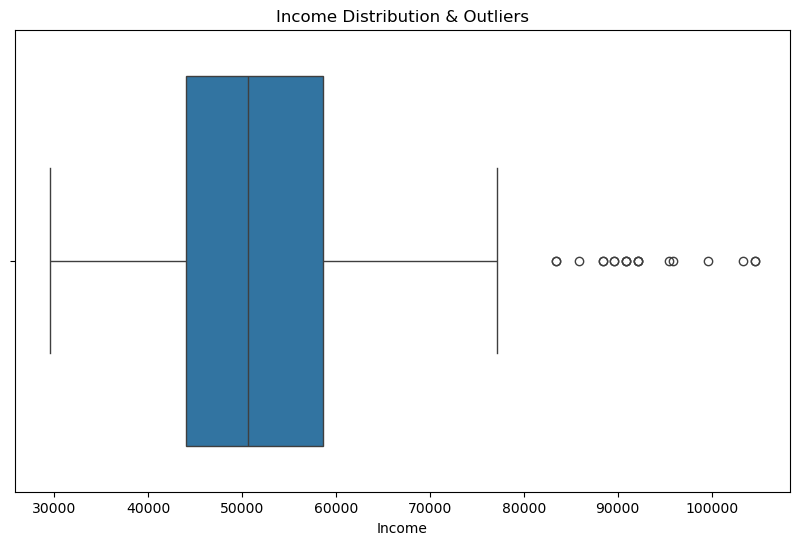

In [ ]:
plt.figure(figsize=[10,6])
sns.boxplot(x="Income", data=df)
plt.title("Income Distribution & Outliers")
plt.savefig('figures/Income_Distribution_and_Outliers.png')
plt.show()

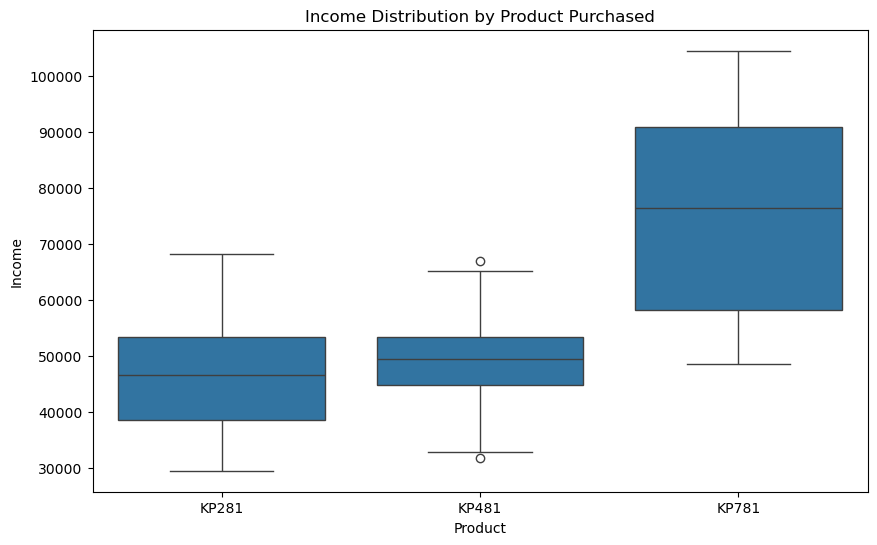

In [ ]:
# Boxplot of Product Purchased vs Income
plt.figure(figsize=[10,6])
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Income Distribution by Product Purchased')
plt.savefig('figures/Income_Distribution_by_Product_Purchased.png')
plt.show()

In [33]:
total_customers = len(df)
product_counts = df["Product"].value_counts()
product_probability = product_counts / total_customers
print(product_probability)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: count, dtype: float64


In [34]:
income_bins = [0, 40000, 60000, 80000, 100000, df["Income"].max()]
income_labels = ["Low", "Lower-Mid", "Mid", "Upper-Mid", "High"]

df["IncomeGroup"] = pd.cut(df["Income"], bins=income_bins, labels=income_labels)

In [35]:
fitness_cond_prob = (
    pd.crosstab(df["Fitness"], df["Product"], normalize="index")
)

print(fitness_cond_prob*100)

Product      KP281      KP481      KP781
Fitness                                 
1        50.000000  50.000000   0.000000
2        53.846154  46.153846   0.000000
3        55.670103  40.206186   4.123711
4        37.500000  33.333333  29.166667
5         6.451613   0.000000  93.548387


In [36]:
income_cond_prob = (
    pd.crosstab(df["IncomeGroup"], df["Product"], normalize="index")
)

print(income_cond_prob*100)

Product          KP281      KP481       KP781
IncomeGroup                                  
Low          71.875000  28.125000    0.000000
Lower-Mid    48.113208  41.509434   10.377358
Mid          26.086957  30.434783   43.478261
Upper-Mid     0.000000   0.000000  100.000000
High          0.000000   0.000000  100.000000


In [37]:
combined_cond_prob = (
    pd.crosstab(
        index=[df["IncomeGroup"], df["Fitness"]],
        columns=df["Product"],
        normalize="index"
    )
)

combined_cond_prob*100

Product                   KP281       KP481       KP781
IncomeGroup Fitness                                    
Low         1        100.000000    0.000000    0.000000
            2         60.000000   40.000000    0.000000
            3         73.913043   26.086957    0.000000
            4         66.666667   33.333333    0.000000
Lower-Mid   2         50.000000   50.000000    0.000000
            3         53.333333   45.000000    1.666667
            4         46.666667   46.666667    6.666667
            5         18.181818    0.000000   81.818182
Mid         1          0.000000  100.000000    0.000000
            2        100.000000    0.000000    0.000000
            3         38.461538   46.153846   15.384615
            4          0.000000    0.000000  100.000000
            5          0.000000    0.000000  100.000000
Upper-Mid   3          0.000000    0.000000  100.000000
            4          0.000000    0.000000  100.000000
            5          0.000000    0.000000  100.000000
High        4          0.000000    0.000000  100.000000
            5          0.000000    0.000000  100.000000

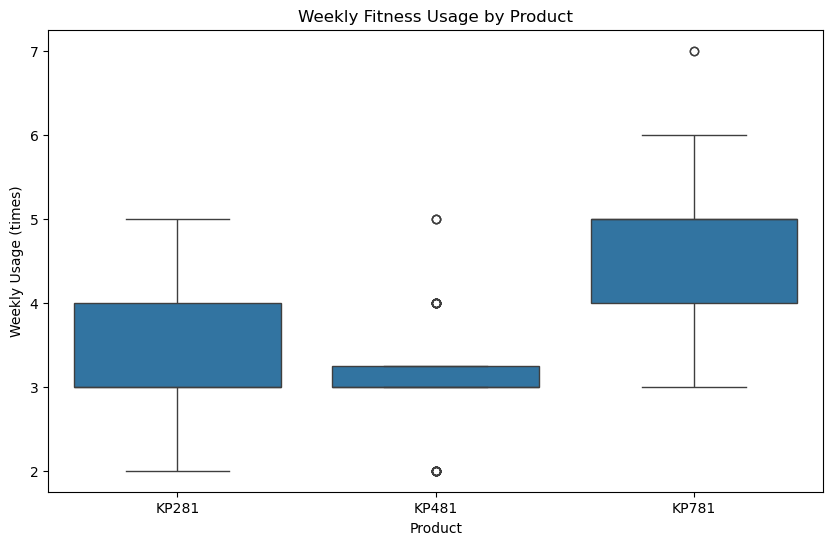

In [ ]:
plt.figure(figsize=[10,6])
sns.boxplot(data=df, x="Product", y="Usage")
plt.title("Weekly Fitness Usage by Product")
plt.ylabel("Weekly Usage (times)")
plt.savefig('figures/Weekly_Fitness_Usage_by_Product.png')
plt.show()

## 3.2. For categorical variable(s): Boxplot

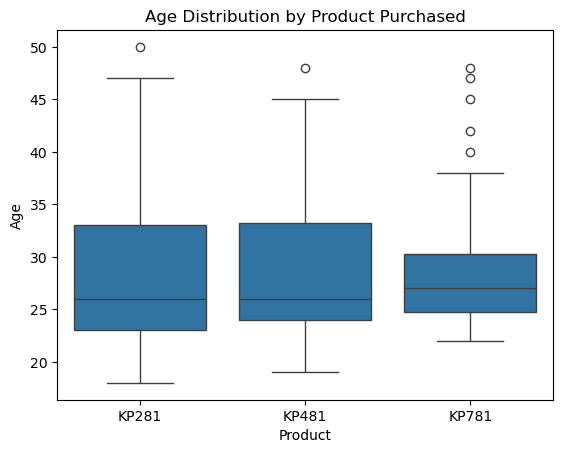

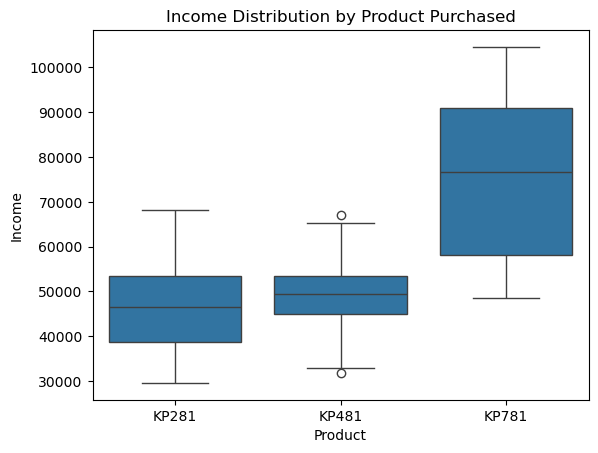

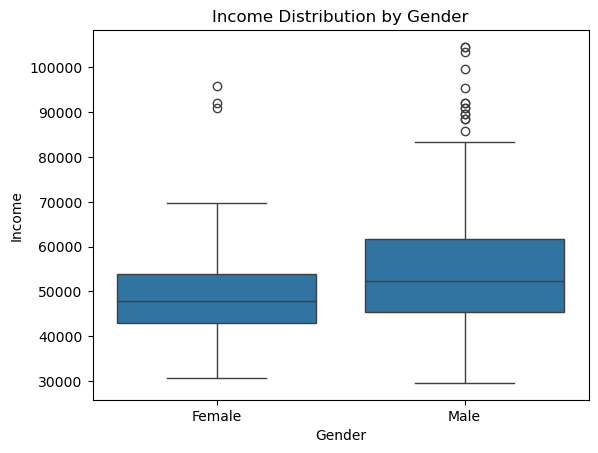

In [ ]:
# Boxplot of Product Purchased vs Age
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Age Distribution by Product Purchased')
plt.savefig("figures/Age_Distribution_by_Product_Purchased.png")
plt.show()

# Boxplot of Product Purchased vs Income
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Income Distribution by Product Purchased')
plt.savefig("figures/Income_Distribution_by_Product_Purchased.png")
plt.show()

# Boxplot of Gender vs Income
sns.boxplot(x='Gender', y='Income', data=df)
plt.title('Income Distribution by Gender')
plt.savefig("figures/Income_Distribution_by_Gender.png")
plt.show()

## 3.3. For correlation: Heatmaps, Pairplots

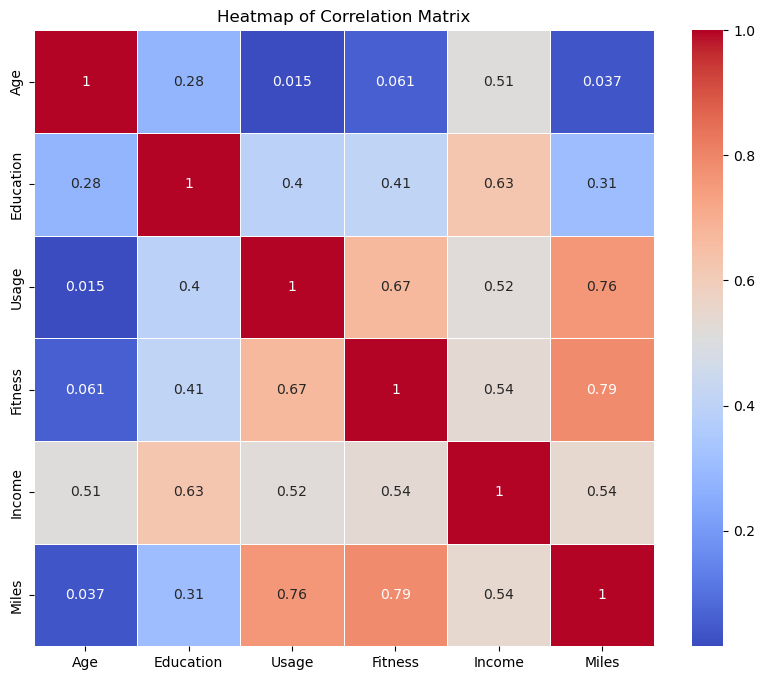

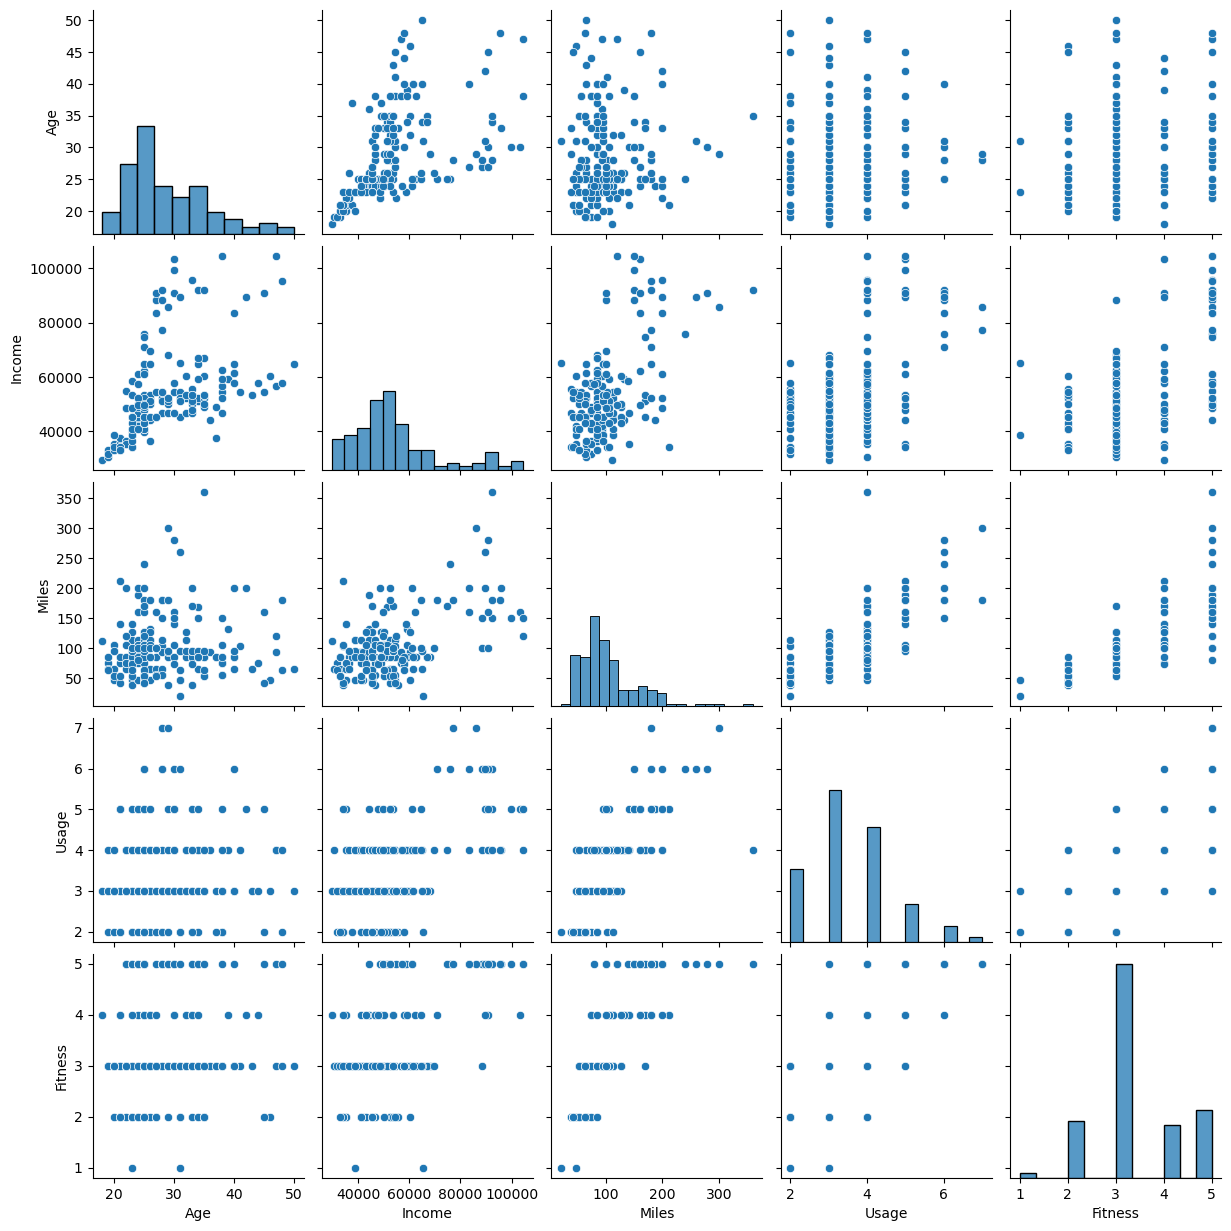

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.savefig("figures/Heatmap_of_Correlation_Matrix.png")
plt.show()

# Pairplot for selected numerical variables
sns.pairplot(df[['Age', 'Income', 'Miles', 'Usage', 'Fitness']])
plt.savefig("figures/Pairplot_of_Numerical_Variables.png")
plt.show()

# 4. Missing Value & Outlier Detection

In [23]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


# 5. Business Insights based on Non-Graphical and Visual Analysis

## 5.1. Comments on the range of attributes

Each variable provides crucial information about customer characteristics, treadmill usage, and purchasing behavior.

-    **Age:** The customer age range spans from 18 to 50, indicating that Aerofit caters to a wide age group. Younger customers may prefer entry-level models like KP281, while older customers might favor more advanced models (KP781) for enhanced safety and features.


-    **Income:** The income levels range widely, from lower-income individuals (approx. 30,000) to higher-income individuals (over 100,000). This suggests that Aerofit serves a broad customer base, but income levels could heavily influence treadmill model preference. Higher-income customers are likely to choose KP781, the most expensive treadmill, while lower-income customers may opt for KP281.


-    **Usage:** Planned usage (average number of times customers plan to use the treadmill per week) ranges from 2 to 7 times. Customers with higher usage expectations might lean toward more durable or feature-rich models, like the KP481 and KP781.


-    **Miles:** The expected miles customers plan to walk/run range widely, from 21 miles per week to over 360 miles. This is important in suggesting more advanced treadmills to those with higher exercise goals.


-    **Fitness Rating:** Self-rated fitness on a scale of 1 to 5, with most customers reporting fitness levels between 3 and 4. This suggests that the target audience views themselves as moderately fit, and this can inform how Aerofit markets treadmills with advanced fitness tracking features.

## 5.2. Comments on the distribution of the variables and relationship between them

The distribution of variables can help Aerofit understand customer demographics and behavioral patterns.

-    **Age Distribution:** The age distribution is right-skewed, with most customer in 20 to 30. Younger and older segments are less frequent but should not be ignored in targeted campaigns.


-    **Income Distribution:** The income distribution is right-skewed, with more customers in the lower-to-middle-income brackets. However, there is a long tail of higher-income individuals, which suggests a need for Aerofit to segment its offerings more clearly by income.


-    **Product:** The most frequently purchased treadmill model is KP281, an entry-level treadmill, followed by the KP481 and KP781 models. This shows that while budget-conscious customers dominate, there is a significant segment of the market that prefers mid-range and high-end models.


**Correlation Insights:**


-    **Income and Product:** Higher-income customers tend to prefer more advanced models (KP481 and KP781). This relationship could be used in pricing and promotional strategies.


-    **Age and Fitness:** There is no strong correlation between age and fitness levels, indicating that people of all age groups buy treadmills irrespective of their self-perceived fitness level.


-    **Miles and Usage:** As expected, the number of miles planned per week correlates with higher planned usage (weekly frequency). Aerofit could recommend higher-end models for customers expecting heavy usage.

## 5.3. Comments for each univariate and bivariate plot

**Univariate Analysis:**

-    **Distribution of Age:** The age distribution shows a concentration of customers between 20 and 30 years old, indicating a significant market segment in young individuals. Marketing campaigns should target this age group more effectively, perhaps with features appealing to health maintenance.


-    **Income Distribution:** A right-skewed income distribution implies that Aerofit should continue to offer entry-level models while promoting mid-range and high-end models to higher-income customers who are less price-sensitive. Offering financing options could also widen accessibility for lower-income customers.


-    **Product:** KP281, the entry-level treadmill, is the most popular model, which may indicate that price is a major factor for a significant portion of Aerofit's customer base. Aerofit should emphasize affordability in its marketing for KP281 while highlighting the advanced features of KP481 and KP781 to higher-end customers.


-    **Fitness Rating:** Most customers rate their fitness level as moderate (3) to good (4). Aerofit should promote models like KP481 and KP781 that appeal to individuals looking to maintain or improve their fitness levels, as these individuals are likely to prioritize product features over price.

**Bivariate Analysis:**

-    **Boxplot of Income by Product Purchased:** There’s a clear difference in income across the products. Customers with higher incomes are more likely to purchase the KP781, while lower-income customers purchase KP281. This suggests that price sensitivity is a factor in treadmill choice and that marketing for KP781 should focus on premium customers.


-    **Boxplot of Income by Gender:** The boxplot of income by gender shows little variation between genders, but both male and female customers are concentrated around the 45000 to 50000 bracket. This suggests that Aerofit's customer base is relatively similar across genders in terms of income, so gender-specific marketing may not be necessary.

**Heatmap of Correlations:**

-    **Income and Miles:** The positive correlation between income and miles indicates that higher-income customers may be more health-conscious or exercise more frequently. Aerofit could promote treadmills with advanced features (e.g., fitness tracking, endurance) to these customers.


-    **Pairplot of Age, Income, Miles, and Fitness:** The pairplot shows that higher fitness levels and higher incomes are associated with more miles and treadmill usage per week. This reinforces the need for Aerofit to segment its customer base based on fitness levels and recommend treadmills accordingly. For example, KP781 could be marketed as a high-end product for fitness enthusiasts with higher disposable income.

# 6. Recommendations

**Segment Customers Based on Income:**

-    KP281: Market this entry-level treadmill to customers with lower incomes. Emphasize affordability and basic features.

-    KP481 & KP781: Promote these mid-range and premium models to higher-income customers, focusing on advanced features, durability, and added benefits like fitness tracking.

**Target Middle-Aged Customers:**

-    Since most of your customers are between 30 and 50 years old, tailor your marketing messages to this age group. Highlight benefits such as health maintenance, staying active, and convenient home workouts.

**Highlight Fitness Levels in Marketing:**

-    Most customers see themselves as moderately fit. Use messaging that encourages maintaining and improving fitness levels. For KP481 and KP781, emphasize features that support fitness goals, such as higher endurance and customizable workout programs.

**Use Personalized Recommendations:**

-    When a new customer shows interest, provide personalized treadmill recommendations based on their income, fitness level, and usage frequency. For example, suggest a KP781 for those with high fitness expectations and KP281 for beginners.

**Offer Financing Options:**

-    To attract customers with lower incomes, introduce financing plans for all models, especially for KP481 and KP781. This can make higher-end models more accessible to a broader customer base.

**Focus on Heavy Users:**

-    Customers who plan to use the treadmill frequently and run longer miles each week should be recommended more durable and feature-rich models like KP481 or KP781. Promote warranties and endurance features for these users.

**Create a Loyalty Program:**

-    Introduce a loyalty or rewards program for repeat customers, offering discounts on accessories or upgrades for treadmills. This can drive long-term engagement and increase customer retention.

**Use Fitness Challenges:**

-    Create fitness challenges or programs for customers using your treadmills, encouraging regular use and higher engagement with your products. Offer incentives like free accessories or extended warranties for customers who meet their goals.

**Develop Marketing Content for All Age Groups:**

-    While most customers fall in the 20–30 age group, don't ignore older segments. Create specific campaigns for older customers looking for gentle, low-impact workouts.

**Bundle Offers with Accessories:**

-    Offer bundles that include fitness accessories like mats, dumbbells, or exercise balls with the purchase of treadmills. This can enhance the perceived value, especially for customers buying the KP281 model.